In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import calendar


# Importing Atlantic Hurricane data

In [56]:
df = pd.read_csv('assets/atlantic.csv')
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [57]:
df.shape

(49105, 22)

The naming convention was applied to hurricanes starting in 1950. This might indicate better data quality, so we will use hurricane data from 1950 to the most recent year in the dataset

In [58]:
#boolean indexing to df
hurricanes = df[df['Date'] >= 19500000]
hurricanes.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
21879,AL011950,ABLE,19500812,0,,TS,17.1N,55.5W,35,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
21880,AL011950,ABLE,19500812,600,,TS,17.7N,56.3W,40,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
21881,AL011950,ABLE,19500812,1200,,TS,18.2N,57.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
21882,AL011950,ABLE,19500812,1800,,TS,19.0N,58.6W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
21883,AL011950,ABLE,19500813,0,,TS,20.0N,60.0W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [59]:
hurricanes.shape

(27226, 22)

Dropping unnecessary columns

In [60]:
hurricanes = hurricanes.drop(columns=['ID', 'Time', 'Event', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'], axis = 1,)

In [61]:
hurricanes.head()

,Name,Date,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure
21879,ABLE,19500812,TS,17.1N,55.5W,35,-999
21880,ABLE,19500812,TS,17.7N,56.3W,40,-999
21881,ABLE,19500812,TS,18.2N,57.4W,45,-999
21882,ABLE,19500812,TS,19.0N,58.6W,50,-999
21883,ABLE,19500813,TS,20.0N,60.0W,50,-999


In [62]:
hurricanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27226 entries, 21879 to 49104
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              27226 non-null  object
 1   Date              27226 non-null  int64 
 2   Status            27226 non-null  object
 3   Latitude          27226 non-null  object
 4   Longitude         27226 non-null  object
 5   Maximum Wind      27226 non-null  int64 
 6   Minimum Pressure  27226 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.7+ MB


Converting to datetime 

In [63]:
hurricanes['Date'] = pd.to_datetime(hurricanes['Date'].astype(str), format = '%Y %m %d')
hurricanes

,Name,Date,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure
21879,ABLE,1950-08-12,TS,17.1N,55.5W,35,-999
21880,ABLE,1950-08-12,TS,17.7N,56.3W,40,-999
21881,ABLE,1950-08-12,TS,18.2N,57.4W,45,-999
21882,ABLE,1950-08-12,TS,19.0N,58.6W,50,-999
21883,ABLE,1950-08-13,TS,20.0N,60.0W,50,-999
...,...,...,...,...,...,...,...
49100,KATE,2015-11-12,EX,41.3N,50.4W,55,981
49101,KATE,2015-11-12,EX,41.9N,49.9W,55,983
49102,KATE,2015-11-13,EX,41.5N,49.2W,50,985
49103,KATE,2015-11-13,EX,40.8N,47.5W,45,985


Adding seperate year and month columns

In [64]:
hurricanes['Year'] = hurricanes['Date'].map(lambda x: x.year)
hurricanes['Month'] = hurricanes['Date'].map(lambda x: x.month)
hurricanes.head()

,Name,Date,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Year,Month
21879,ABLE,1950-08-12,TS,17.1N,55.5W,35,-999,1950,8
21880,ABLE,1950-08-12,TS,17.7N,56.3W,40,-999,1950,8
21881,ABLE,1950-08-12,TS,18.2N,57.4W,45,-999,1950,8
21882,ABLE,1950-08-12,TS,19.0N,58.6W,50,-999,1950,8
21883,ABLE,1950-08-13,TS,20.0N,60.0W,50,-999,1950,8


In [65]:
print(hurricanes['Year'].unique())

[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [66]:
print(hurricanes['Month'].unique())

[ 8  9 10 11  1  5 12  2  6  7  4]


According to this dataset, no values for March exist

In [67]:
hurricanes.dtypes

Name                        object
Date                datetime64[ns]
Status                      object
Latitude                    object
Longitude                   object
Maximum Wind                 int64
Minimum Pressure             int64
Year                         int64
Month                        int64
dtype: object

No null values are found but negative values such as -999 for wind represents null. Lets drop these values from the dataset and convert to NaN.

In [68]:
cols_to_check = ['Maximum Wind', 'Minimum Pressure']
negative_mask = (hurricanes[cols_to_check] < 0)
hurricanes[cols_to_check] = hurricanes[cols_to_check].mask(negative_mask, np.nan)


In [69]:
negative_exist = ((hurricanes['Maximum Wind'] < 0) | (hurricanes['Minimum Pressure'] < 0)).any()
print("The number of negative values in the Maximum Wind and Minimum Pressure columns are:", negative_exist.sum())

The number of negative values in the Maximum Wind and Minimum Pressure columns are: 0


Dropping hemisphere tags from coordinates

In [70]:
hurricanes['Latitude'] = hurricanes['Latitude'].str[:-1].astype(float)
hurricanes['Longitude'] = hurricanes['Longitude'].str[:-1].astype(float)

In [71]:
print(hurricanes[['Latitude', 'Longitude']].head())

       Latitude  Longitude
21879      17.1       55.5
21880      17.7       56.3
21881      18.2       57.4
21882      19.0       58.6
21883      20.0       60.0


Grouping storms by Max Wind Speed

In [72]:
max_wind_speeds = hurricanes.loc[hurricanes.groupby('Name')['Maximum Wind'].idxmax(), ['Name', 'Maximum Wind', 'Year', 'Month', 'Latitude', 'Longitude']]
max_wind_speeds


,Name,Maximum Wind,Year,Month,Latitude,Longitude
31610,AMY,60.0,1975,6,35.9,70.5
35322,ANA,60.0,1985,7,44.2,60.3
37712,BOB,100.0,1991,8,36.5,74.5
22074,DOG,125.0,1950,9,24.6,67.7
46971,DON,45.0,2011,7,24.6,91.9
...,...,...,...,...,...,...
28964,FRANCELIA,100.0,1969,9,16.4,86.7
36987,GABRIELLE,125.0,1989,9,19.3,55.7
35158,JOSEPHINE,90.0,1984,10,31.4,71.7
39369,SEBASTIEN,55.0,1995,10,21.5,58.5


In [73]:
max_wind_speeds.to_csv('assets/hurr_wind_speed.csv', index=False)

# Classifying hurricanes by the Saffir-Simpson Hurricane Wind Scale (category 1-5)

In [74]:
max_wind_speeds['category'] = None

for index, row in max_wind_speeds.iterrows():
    wind_speed = row['Maximum Wind']
    if wind_speed >= 74 and wind_speed <= 95:
        max_wind_speeds.at[index, 'category'] = 1
    elif wind_speed >= 96 and wind_speed <= 110:
        max_wind_speeds.at[index, 'category'] = 2
    elif wind_speed >= 111 and wind_speed <= 129:
        max_wind_speeds.at[index, 'category'] = 3
    elif wind_speed >= 130 and wind_speed <= 156:
        max_wind_speeds.at[index, 'category'] = 4
    elif wind_speed >= 157:
        max_wind_speeds.at[index, 'category'] = 5
        

max_wind_speeds.head()

,Name,Maximum Wind,Year,Month,Latitude,Longitude,category
31610,AMY,60.0,1975,6,35.9,70.5,None
35322,ANA,60.0,1985,7,44.2,60.3,None
37712,BOB,100.0,1991,8,36.5,74.5,2
22074,DOG,125.0,1950,9,24.6,67.7,3
46971,DON,45.0,2011,7,24.6,91.9,None


Dropping hurricanes under category 1

In [75]:
max_wind_speeds.dropna(subset=['category'], inplace=True)

In [76]:
max_wind_speeds

,Name,Maximum Wind,Year,Month,Latitude,Longitude,category
37712,BOB,100.0,1991,8,36.5,74.5,2
22074,DOG,125.0,1950,9,24.6,67.7,3
23100,FOX,125.0,1952,10,22.0,80.9,3
22723,HOW,85.0,1951,10,32.8,75.7,1
46234,IDA,90.0,2009,11,23.0,86.5,1
...,...,...,...,...,...,...,...
37786,CLAUDETTE,115.0,1991,9,27.0,61.5,3
48597,CRISTOBAL,75.0,2014,8,37.5,63.6,1
28964,FRANCELIA,100.0,1969,9,16.4,86.7,2
36987,GABRIELLE,125.0,1989,9,19.3,55.7,3


Looking at the distribution of hurricanes by category 

In [77]:
category_counts = max_wind_speeds["category"].value_counts()
fig = px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={"x": "Category", "y": "Count"}
)

fig.show()


Interestingly, there are more Category 3 hurricanes than Category 2

Saving max_wind_speeds DF to a new csv

In [78]:
max_wind_speeds.to_csv('assets/hurr_categories.csv', index=False)

In [79]:
max_wind_speeds["category"].unique()

array([2, 3, 1, 4, 5], dtype=object)

Sorting the categories for plotting

In [80]:
category_order = [1, 2, 3, 4, 5]

color_scale = [
    (0, 'blue'),
    (0.25, 'green'),
    (0.5, 'yellow'),
    (0.75, 'orange'),
    (1, 'red')
]

fig = px.scatter(
    max_wind_speeds,
    x="Year",
    y="Maximum Wind",
    color="category",
    color_continuous_scale=color_scale,
    category_orders={"category": category_order}
)

fig.show()

Looking at the distribution of categories by month

In [81]:
category_order = [1, 2, 3, 4, 5]

color_scale = [
    (0, 'blue'),
    (0.25, 'green'),
    (0.5, 'yellow'),
    (0.75, 'orange'),
    (1, 'red')
]

grouped = max_wind_speeds.groupby(["Month", "category"]).size().reset_index(name="count")

month_names = [calendar.month_name[i] for i in range(1, 13)]

fig = px.bar(
    grouped,
    x="Month",
    y="count",
    color="category",
    color_discrete_sequence=color_scale,
    category_orders={"category": category_order},
    barmode="stack"
)

fig.update_layout(
    xaxis=dict(
        ticktext=month_names,
        tickvals=list(range(1, 13))
    ),
    title={
        'text': "Distribution of categories by month",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

We can see how the majority of hurricanes, and specifically higher intensity storms occur between the months of August to October

In [82]:
x = max_wind_speeds['Year']
y = max_wind_speeds['Maximum Wind']

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers'))

fig.update_layout(title='Maximum Wind Speeds for Each Hurricane By Year', xaxis_title='Year', yaxis_title='Maximum Wind Speed (mph)')

fig.show()

# Looking at the distribution of Storms per year

In [83]:
storms_per_year = max_wind_speeds.groupby('Year').size().reset_index(name='Number of storms')
max_wind_speeds_with_count = pd.merge(max_wind_speeds, storms_per_year, on='Year')

max_wind_speeds_with_count.head()

,Name,Maximum Wind,Year,Month,Latitude,Longitude,category,Number of storms
0,BOB,100.0,1991,8,36.5,74.5,2,3
1,GRACE,90.0,1991,10,31.5,61.8,1,3
2,CLAUDETTE,115.0,1991,9,27.0,61.5,3,3
3,DOG,125.0,1950,9,24.6,67.7,3,6
4,JIG,100.0,1950,10,33.0,59.7,2,6


In [84]:
x = storms_per_year['Year']
y = storms_per_year['Number of storms']

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y, marker_color='blue'))
fig.update_layout(title='Number of Hurricanes per Year', xaxis_title='Year', yaxis_title='Number of Hurricanes')

fig.show()

Since we are looking at hurricane systems that are above category 1, the bar graph above has missing years because the respective years did produce storms of a miminum intensity for analysis. 

# Merging the datasets 

In [85]:
co2 = pd.read_csv('assets/co2.csv')
co2.tail()


,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km�
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km�
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km�
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km�
59619,Zimbabwe,ZW,263,2020,779383468.0,16320537.0,390757.0,0.30%,42/km�


In [86]:
print(co2.columns)
print(max_wind_speeds.columns)

Index(['Country', 'Code', 'Calling Code', 'Year', 'CO2 emission (Tons)',
       'Population(2022)', 'Area', '% of World', 'Density(km2)'],
      dtype='object')
Index(['Name', 'Maximum Wind', 'Year', 'Month', 'Latitude', 'Longitude',
       'category'],
      dtype='object')


In [87]:
merged_df = pd.merge(co2, max_wind_speeds, on='Year', how='outer')
merged_df

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),Name,Maximum Wind,Month,Latitude,Longitude,category
0,Afghanistan,AF,93,1750,0.000000e+00,41128771.0,652230.0,0.40%,63/km�,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,AL,355,1750,0.000000e+00,2842321.0,28748.0,0.00%,99/km�,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZ,213,1750,0.000000e+00,44903225.0,2381741.0,1.60%,19/km�,NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,AD,376,1750,0.000000e+00,79824.0,468.0,0.00%,171/km�,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AO,244,1750,0.000000e+00,35588987.0,1246700.0,0.80%,29/km�,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91735,Vietnam,VN,84,2020,3.977272e+09,98186856.0,331212.0,0.20%,296/km�,NaN,NaN,NaN,NaN,NaN,NaN
91736,Wallis and Futuna,WF,681,2020,5.072470e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91737,Yemen,YE,967,2020,6.246542e+08,33696614.0,527968.0,0.40%,64/km�,NaN,NaN,NaN,NaN,NaN,NaN
91738,Zambia,ZM,260,2020,2.479878e+08,20017675.0,752612.0,0.50%,27/km�,NaN,NaN,NaN,NaN,NaN,NaN


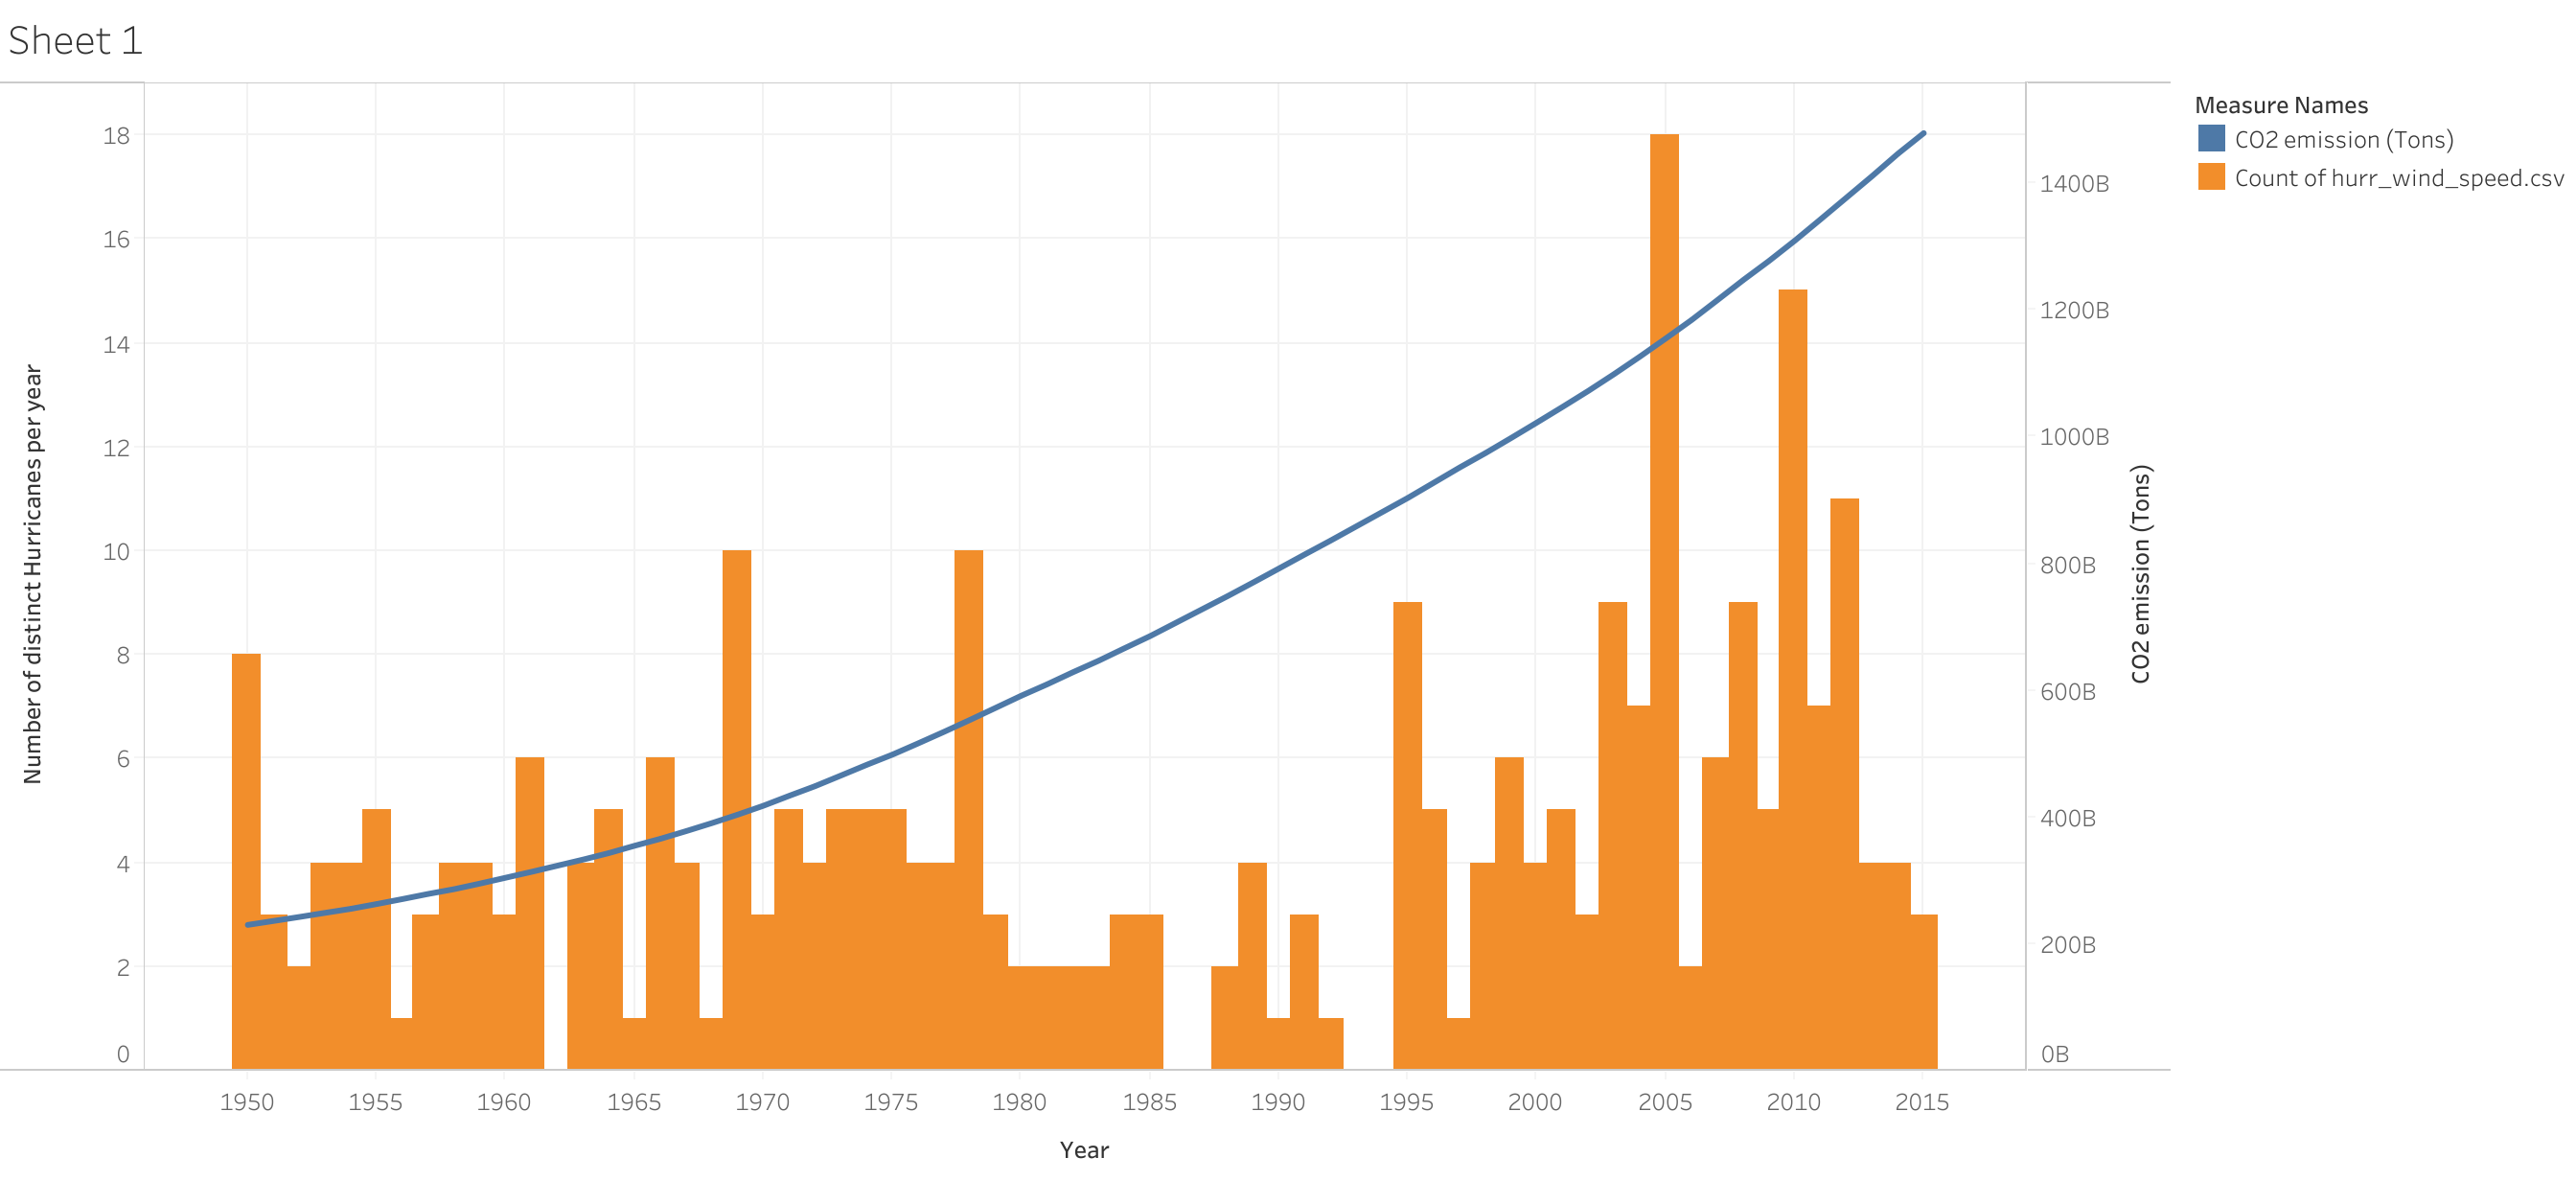

In [88]:
from IPython.display import Image
Image(filename='Sheet 1.png')

We can see how CO2 levels are steadily increasing over time. We also see how the distribution of the number of hurricanes also appears to be increasing. However, the distribution of the number of hurricanes is uneven and doesn't appear to follow the same pattern as CO2 data. Yet in recent years (1995-2015) the peaks of hurricane systems appears higher overall, which may be correlated to latent concentrations of CO2 levels. Let's look at the percent change of these values to determine if the rate of change is simmilar.

# Calculating percent change for CO2 and hurricane data

In [89]:
merged_df_copy = merged_df.copy()

In [90]:
emissions_by_year = merged_df_copy.groupby('Year')['CO2 emission (Tons)'].sum()
percent_change = emissions_by_year.pct_change()
percent_change = percent_change.dropna()
percent_change.head()

Year
1751    1.000000
1752    0.500196
1753    0.333420
1754    0.250147
1755    0.200172
Name: CO2 emission (Tons), dtype: float64

In [91]:
hurr_by_year = merged_df_copy.groupby('Year')['Maximum Wind'].sum()
percent_change_hurr = hurr_by_year.pct_change()
percent_change_hurr = percent_change_hurr.dropna()
percent_change_hurr.head()

Year
1950         inf
1951   -0.480315
1952   -0.333333
1953    0.454545
1954    0.000000
Name: Maximum Wind, dtype: float64

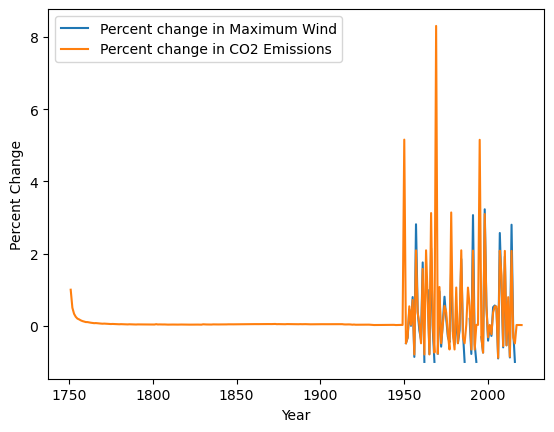

In [92]:
plt.plot(percent_change_hurr.index, percent_change_hurr.values, label='Percent change in Maximum Wind')
plt.plot(percent_change.index, percent_change.values, label='Percent change in CO2 Emissions')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.show()

In [93]:
from plotly.subplots import make_subplots

In [94]:
min_val = min(percent_change.min(), percent_change_hurr.min())
max_val = max(percent_change.max(), percent_change_hurr.max())

fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.1)

fig.add_trace(go.Scatter(x=percent_change_hurr.index, y=percent_change_hurr.values, name='Percent change in Maximum Wind', fill='tozeroy', stackgroup='group'), row=1, col=1)

fig.add_trace(go.Scatter(x=percent_change.index, y=percent_change.values, name='Percent change in CO2 Emissions', fill='tozeroy', stackgroup='group'), row=1, col=1)

fig.update_layout(
    title='Percent Change of Maximum Wind and CO2 Emissions over Time',
    xaxis_title='Year',
    yaxis_title='Percent Change',
    yaxis_range=[min_val, max_val]
)

fig.show()